In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Kaplan-Meier Estimator
* https://en.wikipedia.org/wiki/Survival_function
* https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator

Survival function $S(t)$ gives the probability $P(T > t)$ of surviving past time $t$. $S(t)$ of a cumulative distribution function $F(t)$ is defined as

$$
S(t) = P(T > t) = \int_{t}^{\infty}f(x)\mathrm{d}x = F(\infty) - F(t) = 1 - F(t)
$$

In our case, $F(t)$ is a CDF of an exponential distribution $F(t) = 1 - e^{-\lambda t}$ and
$f(x)$ is its PDF, $S(t)$ is then

$$
S(t) = \int_{t}^{\infty}\lambda e^{-\lambda x}\mathrm{d}x = e^{-\lambda t}
$$

In [25]:
def survival(t, lambda_):
    return np.exp(-lambda_ * t)

In [22]:
def plot_survival(lambda_=0.1):
    t = np.linspace(0, 100, 1000)
    s = survival(t, lambda_=lambda_)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(t, s, color="red")
    ax.set_xlabel("$t$ [seconds]")
    ax.set_ylabel("$S(t)$")
    ax.set_title(f"$S(t) = e^{{-\lambda t}}, \lambda={lambda_}$")
    plt.show()

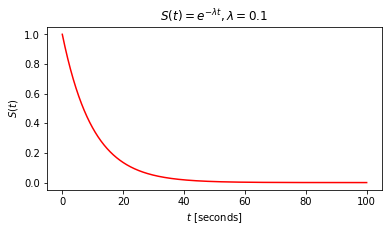

In [23]:
plot_survival()

Estimator $\hat{S}(t)$ of a survival function $S(t)$ is

$$
\hat{S}(t) = \prod_{i: t_i<t}\left( 1 - \frac{d_i}{n_i}\right)
$$

where $d_i$ is the number of deaths at time $t_i$ and $n_i$ is the surviving population at time $t_i$.

In [67]:
n_0 = 10000  # initial population
t = np.linspace(0, 50, 50)
s = survival(t, lambda_=0.1)  # probability of survival past time t
n = n_0 * s  # surviving population at t
d = -1 * np.diff(n, 1)
d = np.concatenate([d, [0]])

In [68]:
def kaplan_meier_estimator(d, n, i):
    return np.prod(1 - (d[:i] / n[:i]))

In [69]:
s_hat = np.array([kaplan_meier_estimator(d, n, i) for i, _ in enumerate(t)])

In [70]:
def plot_kaplan_meier_estimator(t, s, s_hat):
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    ax.plot(t, s, "r", label="$S(t)$")
    ax.plot(t, s_hat, "b+", label="$\hat{S}(t)$")
    ax.set_xlabel("$t$ [seconds]")
    ax.set_ylabel("$S(t)$")
    ax.set_title(f"Kaplan-Meier")
    plt.legend()
    plt.show()

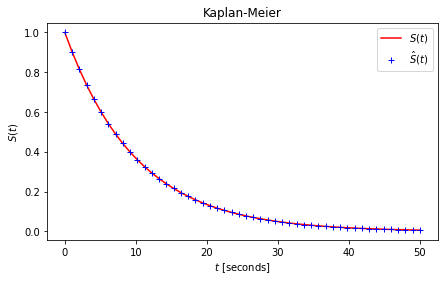

In [71]:
plot_kaplan_meier_estimator(t, s, s_hat)